## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283595,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703354,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#For plotting
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# housing.hist(bins=50, figsize=(20,20))

## Train-Test Splitting

In [9]:
# For Learning Purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# len(train_set)

In [12]:
# len(test_set)

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print("Train set length: " + str(len(train_set))+ "\nTest set length: " + str(len(test_set)))

Train set length: 404
Test set length: 102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
# strat_test_set.CHAS.value_counts()

In [16]:
# strat_train_set.CHAS.value_counts()

In [17]:
housing = strat_train_set.copy()

## Looking for Correlations

In [18]:
corr_matrix = housing.corr()
corr_matrix.MEDV.sort_values(ascending = False)

MEDV       1.000000
RM         0.676922
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251B27F9160>,
      dtype=object)

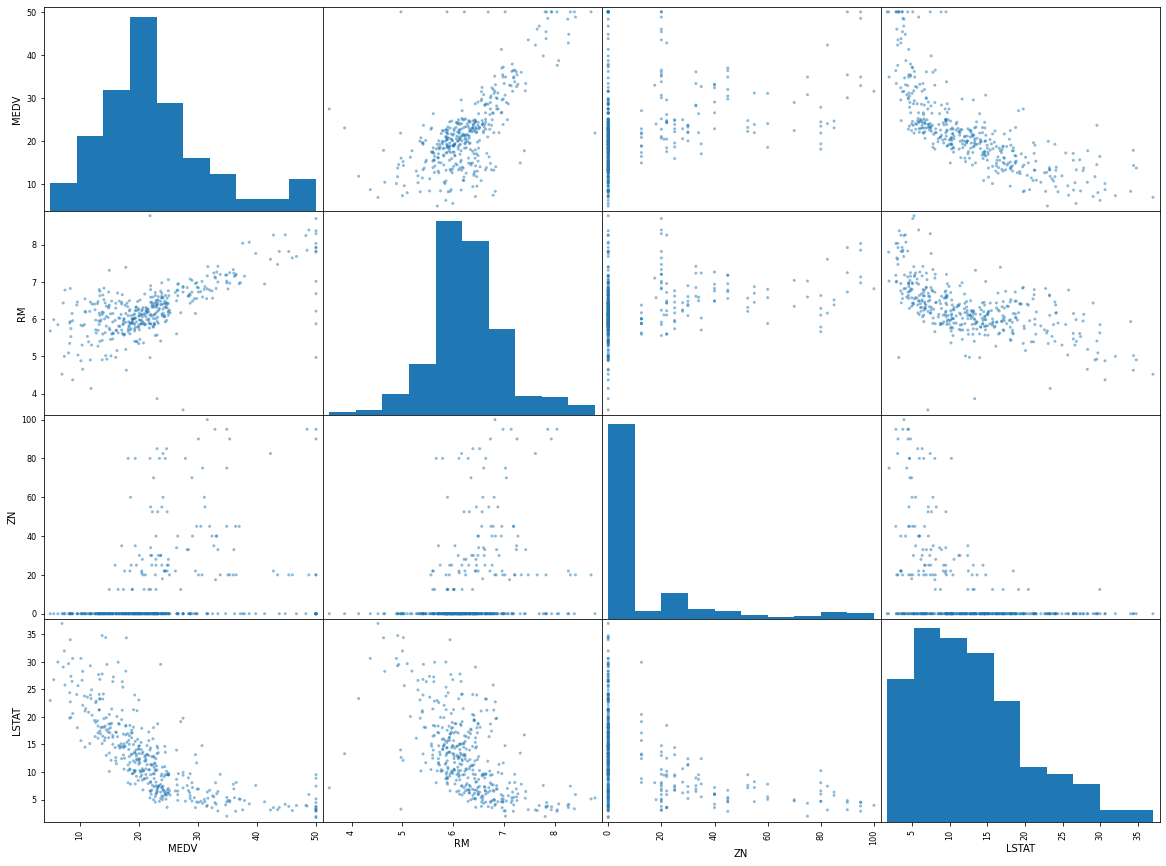

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(20,15))

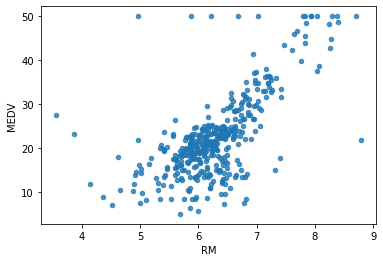

In [20]:
housing.plot(kind = 'scatter', alpha=0.8, x='RM', y='MEDV')

## Attribute Combinations

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.TAXRM.head()

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
Name: TAXRM, dtype: float64

In [23]:
corr_matrix = housing.corr()
corr_matrix.MEDV.sort_values(ascending = False)

MEDV       1.000000
RM         0.676922
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528018
LSTAT     -0.740494
Name: MEDV, dtype: float64

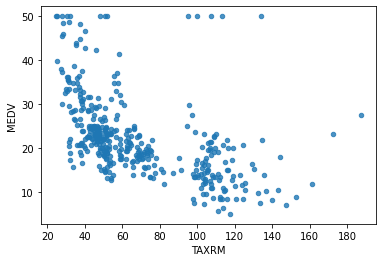

In [24]:
housing.plot(kind = 'scatter', alpha=0.8, x='TAXRM', y='MEDV')

In [25]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_label = strat_train_set['MEDV'].copy()

## Missing Attributes

There are 3 ways:
    1. Get rid of the data points (rows)
    2. Get rid of the attributes (columns)
    3. Substitute some values (0, mean or median)

In [26]:
# Option 1
# Original housing dataframe will not change
# a = housing.dropna(subset=['RM'])
# a.shape

In [27]:
# Option 2
# Original housing dataframe will not change
#housing.drop("RM",axis=1)

In [28]:
# Option 3
# median = housing.RM.median()
# median

In [29]:
# housing.RM.fillna(median)

In [30]:
# housing.info() #TAXRM has non-null columns

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X = imputer.transform(housing)

In [34]:
house_tr = pd.DataFrame(X, columns = housing.columns)

In [35]:
house_tr.info() # No non null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


## Scikit-Learn Design

Three type of objects:
1. Estimators:It estimates some of the parameters based on a dataset. e.g., Imputers. It has a fit method and a transform method. Fit method: fits the dataset and calculates internal parameters.

2. Transformers: It takes input and returns output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors: It has two common functions - fit and predict.It also gives score function which will evaluate the predictions. e.g., Linear Regression model.

## Feature Scaling

Primarily two types of feature scaling:
    1. Min-Max Scaling (Normalization): (value-min)/(max-min)
        Sklearn provides a class called MinMaxScalar for this.
    2. Standardization: (value-min)/std deviation
        Sklearn provides a class called StandardScalar called this.

## Creating a Pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    # Add as many pipelines as you want
    ('std_scalar', StandardScaler())
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing) #if we take housing_tr the result will be same. The same imputing is done in the pipeline as it was done above.

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model for Dragon Real Estate

In [39]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
prepared_data = my_pipeline.fit_transform(some_data)
model.predict(prepared_data)

array([20.223, 32.101,  9.394, 21.466, 21.477])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_label,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_mse, lin_rmse)
# Overfitting case after Decision Tree Classifier

1.6347553886138573 1.2785755310555014


## Using a better evaluation technique - Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.85949721, 4.05590562, 3.14801338, 3.84256684, 3.05052102])

In [44]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [45]:
print_scores(rmse_scores)

Scores:  [2.85949721 4.05590562 3.14801338 3.84256684 3.05052102]
Mean:  3.391300815138557
Standard Deviation:  0.4697819270549643


In [46]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the Model on Test Data

In [51]:
X_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.fit_transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(y_test))

In [49]:
final_rmse

3.4496347419605424

## Rough Cell

In [53]:
prepared_data[0]

array([-0.54613254,  1.22474487, -0.72437731,  0.        , -1.24995952,
       -1.56482553, -0.63315717,  1.28708093, -0.8260802 , -0.34670673,
       -1.39707095, -0.77512458, -0.46346653])

## Using the built model

In [54]:
from joblib import dump, load
import numpy as np
model = load("Dragon.joblib")
features = np.array([[-0.54613254,  1.22474487, -0.72437731,  0.        , -1.24995952,
       -1.17482553, -0.63315717,  1.28708093, -0.8260802 , -0.34670673,
       -1.39707095, -0.77512458, -0.46346653]])
print("The price is: ", list(model.predict(features)))

The price is:  [20.302999999999997]
